In [157]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.interpolate

In [161]:
# Generate some random-looking monotonic function
np.random.seed(11987)
N = 11

ys1 = np.concatenate(((0,), np.cumsum(np.abs(np.random.normal(0, 1, N - 1)))))
ys1 /= np.max(ys1)

ys2 = np.concatenate(((0,), np.cumsum(np.abs(np.random.normal(0, 1, N - 1)))))
ys2 /= np.max(ys1)

xs = np.linspace(-1, 1, N)
f1 = scipy.interpolate.interp1d(xs, ys1, 'cubic')
f2 = scipy.interpolate.interp1d(xs, ys2, 'cubic')

In [162]:
def plot_multiplication_traj(ax, x2, N=100, hlines=set()):
    x1ss = np.linspace(-1, 1, 40)
    cmap = mpl.cm.get_cmap('viridis')
    for i in range(0, len(x1ss) - 1):
        x10, x11 = x1ss[i], x1ss[i + 1]
        x1c = 0.5 * (x10 + x11)
        c = 0.5 * (1.0 + x1c * x2)
        ax.plot([x10, x11], [f1(x10) + f2(x2), f1(x11) + f2(x2)], color=cmap(c), linewidth=4)

    x1s = np.linspace(-1, 1, 1000)
    ax.plot(x1s, f1(x1s) + f2(x2), 'k:', linewidth=2)

    for x1 in (-1, 0, 1):
        y = f1(x1) + f2(x2)
        ax.plot([x1], [y], 'ko')
        if not y in hlines:
            hlines.add(y)
            ax.axhline(y, linestyle='--', color='k', linewidth=0.5)

NameError: name 'utils' is not defined

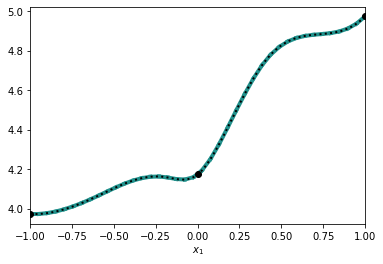

In [167]:
fig, ax = plt.subplots()
xs = np.linspace(-1, 1, 100)
plot_multiplication_traj(ax, 0)
ax.set_xlim(-1, 1)
ax.set_xlabel("$x_1$")
utils.annotate(ax, 0.1, 0.5, 0.2, 0.5, "foo")

ax.set_yticks([])
for spine in ["left", "right", "top"]:
    ax.spines[spine].set_visible(False)